In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


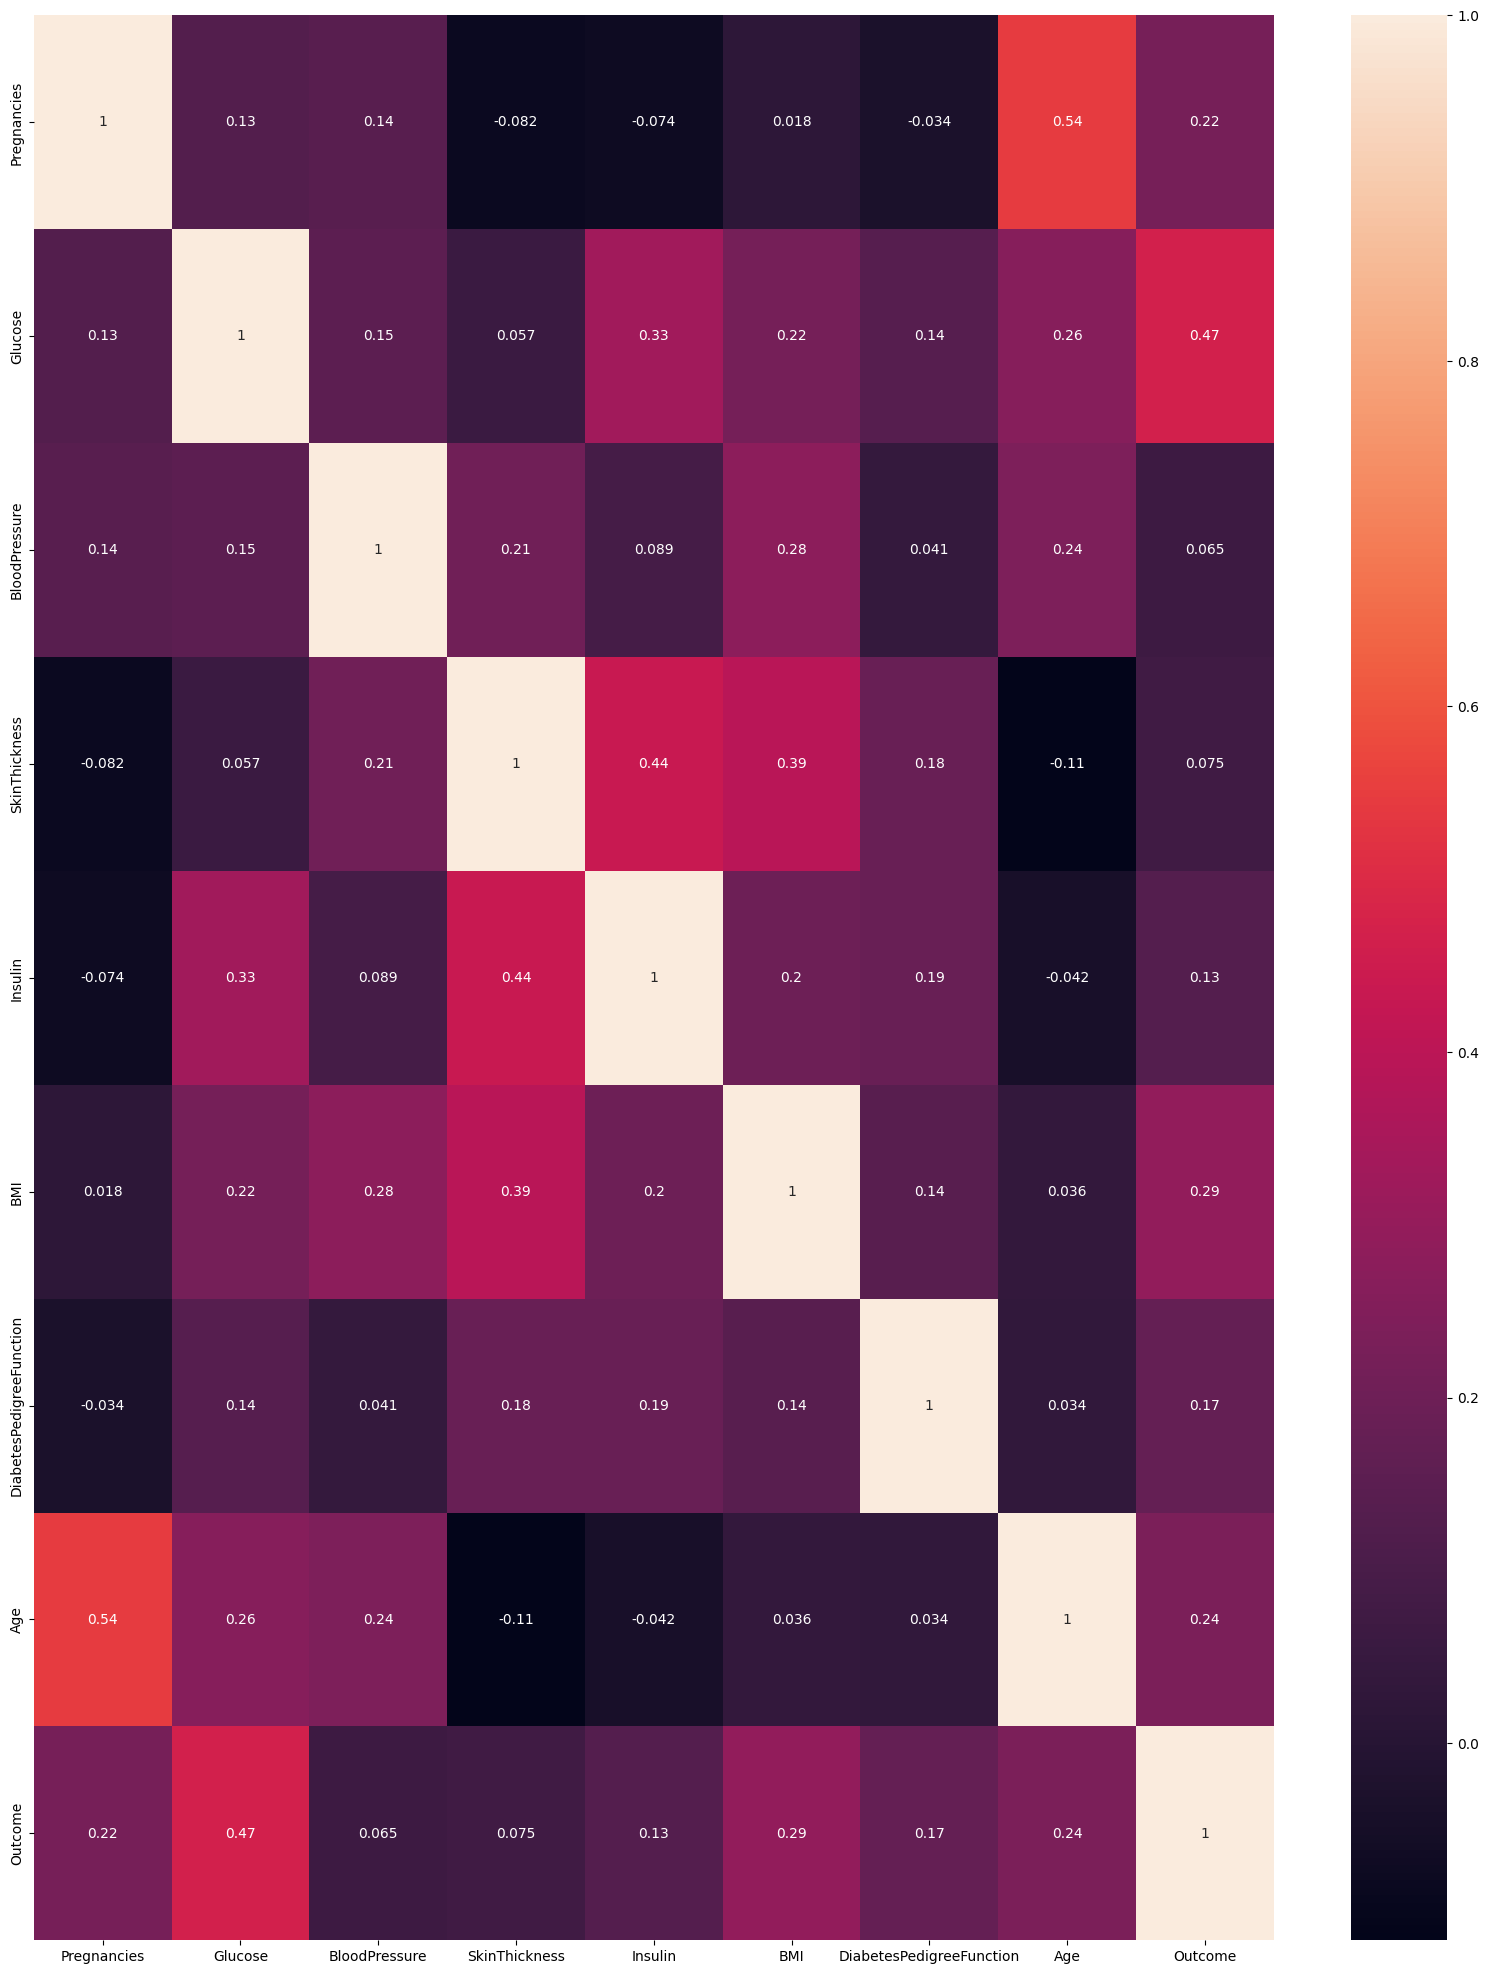

In [9]:
correlation = df.corr()
plt.figure(figsize=(20,25))
sns.heatmap(correlation,annot = True)
plt.show()


In [13]:
scaler = StandardScaler()
x = scaler.fit_transform

In [14]:
X = df.loc[:,["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]
Y = df["Outcome"]

In [15]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [16]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [27]:
X_train.shape

(614, 8)

In [28]:
X_test.shape

(154, 8)

In [29]:
Y_train.shape

(614,)

In [30]:
Y_test.shape

(154,)

In [18]:
classifier_rf = RandomForestClassifier(n_estimators = 500,max_depth = 2)

classifier_rf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=2, n_estimators=500)

In [21]:
y_pred = classifier_rf.predict(X_test)

print(accuracy_score(Y_test,y_pred)*100)
print(f1_score(Y_test,y_pred))

77.27272727272727
0.6067415730337079


In [24]:
rf = RandomForestClassifier()

params = {"max_depth":[2,3,4,5],
         "min_samples_leaf":[1,2,3,4,5,6,7],
         "n_estimators":[100,200,300,400],
         }
grid_search = GridSearchCV(estimator = rf,
                          param_grid = params)
grid_search.fit(X_train,Y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'n_estimators': [100, 200, 300, 400]})

In [25]:
#to find the best parameter after tuning

print(grid_search.best_params_)
#how our model looks after hyperparameter tuning

print(grid_search.best_estimator_)

{'max_depth': 4, 'min_samples_leaf': 4, 'n_estimators': 100}
RandomForestClassifier(max_depth=4, min_samples_leaf=4)


In [26]:
Y_grid = grid_search.predict(X_test)
print(accuracy_score(Y_test,Y_grid)*100)
print(f1_score(Y_test,Y_grid))

77.27272727272727
0.6534653465346534
